<a href="https://colab.research.google.com/github/AregSP/armenian-it-salaries/blob/main/armenian_it_salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The dataset used in this notebook was accessed [here](https://salaries.am) (the version as of 19.10.2024)

In [149]:
import pandas as pd

salaries = pd.read_csv('armenian_it_salaries.csv', names=['date', 'company', 'title', 'salary', 'experience']).drop(0)

salaries # the salaries are displayed in Armenian Drams, and the experiences are displayed in years

,date,company,title,salary,experience
1,4/15/2019 14:54:09,International IT Company,IT Project Manager,"700,000",NaN
2,4/15/2019 14:54:55,NaN,Team Leader,"2,500,000",NaN
3,4/15/2019 14:55:12,NaN,DevOps,"1,450,000",NaN
4,4/15/2019 14:55:30,NaN,Junior Java Developer,"600,000",NaN
5,4/15/2019 14:56:39,NaN,Senior Software Engineer,"1,100,000",NaN
...,...,...,...,...,...
1102,9/2/2024 14:08:42,NaN,Database developer,"890,000",4
1103,9/11/2024 22:19:17,NaN,Product manager,"450,000",2
1104,9/14/2024 19:52:42,NaN,ML Engineer and Researcher,"300,000",3
1105,9/14/2024 19:53:15,NaN,AI Engineer and Researcher,"100,000",0


Some title names and years of experience are missing. The salary and experience need to be converted to numerical format.

In [150]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106 entries, 1 to 1106
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        1106 non-null   object
 1   company     725 non-null    object
 2   title       1106 non-null   object
 3   salary      1106 non-null   object
 4   experience  1049 non-null   object
dtypes: object(5)
memory usage: 43.3+ KB


In [151]:
salaries_copy = salaries.copy() # working on copy to keep the original data clean

salaries_copy['salary'] = pd.to_numeric(salaries_copy['salary'].str.replace(',',''))
salaries_copy['experience'] = pd.to_numeric(salaries_copy['experience'])

salaries_copy.describe()

,salary,experience
count,1106,1049
mean,780023,4
std,954133,4
min,22000,0
25%,250000,2
50%,500000,3
75%,1000000,5
max,15500000,30


# Initial lookup

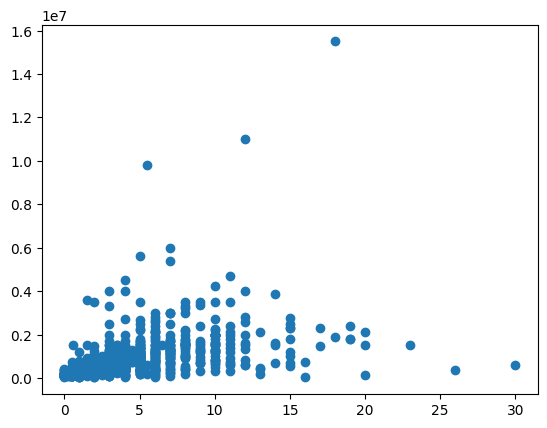

In [152]:
import matplotlib.pyplot as plt

plt.scatter(salaries_copy['experience'], salaries_copy['salary'])

plt.show()

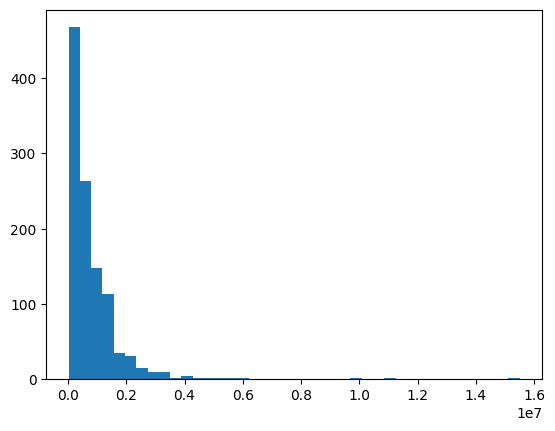

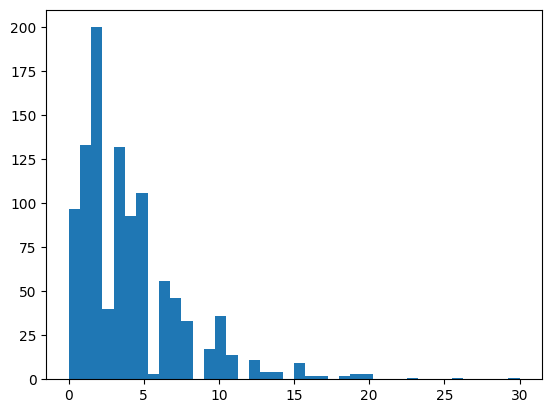

In [153]:
plt.hist(salaries_copy['salary'], bins=40)
plt.show()

plt.hist(salaries_copy['experience'],  bins=40)
plt.show()

Train / Test split

In [154]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(salaries, test_size=0.2, random_state=42)

train_set

,date,company,title,salary,experience
774,6/28/2022 16:09:01,EPAM,Junior JS Engineer,"150,000",0.5
729,4/2/2022 16:11:16,Wirestock,Illustrator,"350,000",5
868,12/16/2022 21:30:29,NaN,Mid Machine Learning Engineer,"450,000",2.5
508,2/4/2021 0:27:33,NaN,Software Engineer,"930,000",4.5
320,12/24/2019 11:18:20,PicsArt,Community Manager,"500,000",2
...,...,...,...,...,...
467,9/14/2020 21:44:50,PicsArt,Intern iOS Developer,"80,000",0
122,4/17/2019 22:27:02,STDev,Manual QA Engineer,"100,000",0.5
1045,3/25/2024 18:18:24,Fast Bank,Senior QA Engineer,"650,000",3
1096,8/20/2024 14:10:43,Local Express Armenia,Email marketing manager,"270,000",1


Salary and Experience are significantly correlated

In [155]:
import numpy as np

train_set_copy = train_set.copy()
train_set_copy['salary'] = pd.to_numeric(train_set_copy['salary'].str.replace(',', ''))
train_set_copy['experience'] = pd.to_numeric(train_set_copy['experience'])

numerical_features = train_set_copy.select_dtypes(include=np.number)
correlation_matrix = numerical_features.corr()
print(correlation_matrix)

            salary  experience
salary           1           0
experience       0           1


Create a new feature - Seniority Level, using the title names. Using experience as the plan B.

In [156]:
def assign_seniority_level(row):

  '''
  The instance gets a seniority level based on this logic:

  1. (Priority) The title contains the keyword(s)

  2. (Alternative)
  0-2 years - Junior
  5+ years - Senior
  '''

  senior_variatons = ['senior', 'head', 'lead', 'chief', 'director']

  # Prioritize keyword
  if 'intern' in row['title'].lower():
    return 'Intern'
  elif 'junior' in row['title'].lower():
    return 'Junior'
  elif any(variation in row['title'].lower() for variation in senior_variatons):
    return 'Senior'

  else:  # Fallback to experience if no keyword found
    if row['experience'] < 3:
      return 'Junior'
    elif row['experience'] >= 5:
      return 'Senior'
    else:
      return 'Unknown' # this class contains the instances that dont have the keyword in their title and also their experience is missing



train_set_copy['seniority_level'] = train_set_copy.apply(assign_seniority_level, axis=1)

train_set_copy

,date,company,title,salary,experience,seniority_level
774,6/28/2022 16:09:01,EPAM,Junior JS Engineer,150000,0,Junior
729,4/2/2022 16:11:16,Wirestock,Illustrator,350000,5,Senior
868,12/16/2022 21:30:29,NaN,Mid Machine Learning Engineer,450000,2,Junior
508,2/4/2021 0:27:33,NaN,Software Engineer,930000,4,Unknown
320,12/24/2019 11:18:20,PicsArt,Community Manager,500000,2,Junior
...,...,...,...,...,...,...
467,9/14/2020 21:44:50,PicsArt,Intern iOS Developer,80000,0,Intern
122,4/17/2019 22:27:02,STDev,Manual QA Engineer,100000,0,Junior
1045,3/25/2024 18:18:24,Fast Bank,Senior QA Engineer,650000,3,Senior
1096,8/20/2024 14:10:43,Local Express Armenia,Email marketing manager,270000,1,Junior


Salary distribution across different seniority levels

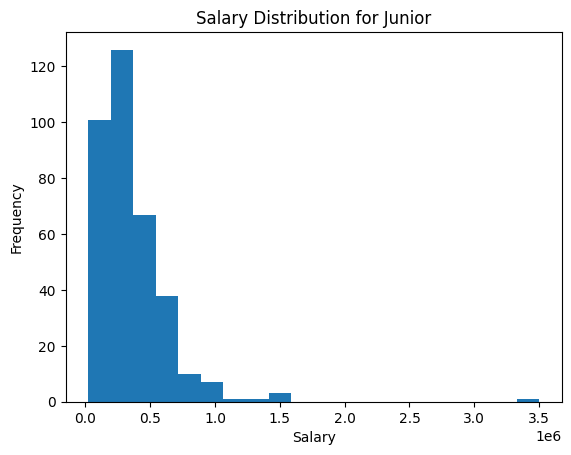

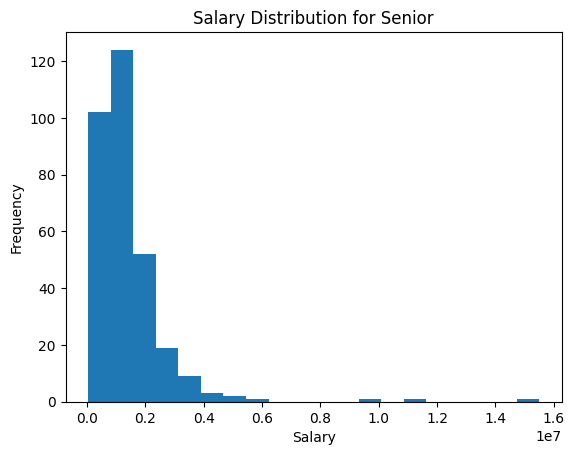

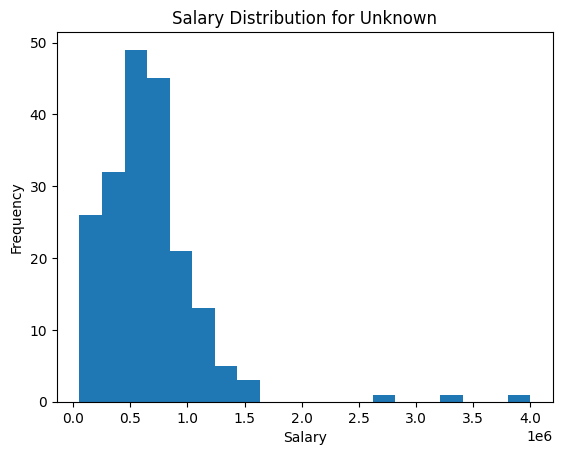

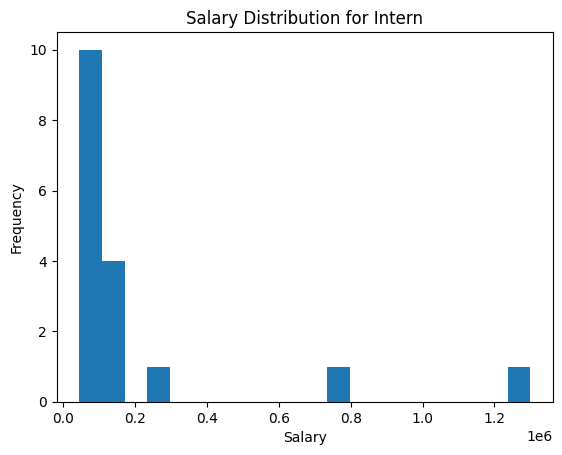

In [157]:
import seaborn as sns

for seniority_level in train_set_copy['seniority_level'].unique():
  plt.figure()
  plt.hist(train_set_copy[train_set_copy['seniority_level'] == seniority_level]['salary'], bins=20)
  plt.title(f'Salary Distribution for {seniority_level}')
  plt.xlabel('Salary')
  plt.ylabel('Frequency')
  plt.show()

The data is messy, and some titles and title names provide no value. Unsupervised learning techniques (vectorization, dimensionality reduction, clustering) will assist in taking a closer look at the text and convert it to numerical input for the model.

In [158]:
len(train_set_copy['company'].unique()), len(train_set_copy['title'].unique())

(348, 581)

# Standardize job titles for more precise clustering

In [159]:
import re
import json


def remove_noise(text, noise_words):
  '''
  This function removes noise words from the string (see custom_mappings.json). After assigning the seniority level to instances, those can be dropped from titles for clarity.
  '''
  pattern = r'\b(' + '|'.join(noise_words) + r')\b'  # Create a regex pattern
  cleaned_text = re.sub(pattern, '', text, flags=re.IGNORECASE)  # Remove matching words
  return cleaned_text.strip()  # Remove leading/trailing spaces


# a dictionary of hard coded words that will combine the similar job titles with different names / punctuation under 1 value (available in the repo)
custom_mappings = json.load(open('custom_mappings.json'))

def standardize_titles(row):

  """
  Modify the job titles to boost generalization of clustering.
  The instances go through 1 out of 3 stages of standardization depending on their original value.
  """


  # first stage of standardization. its a list containing "buzzwords". if an instance contains any of the buzzwords, it gets converted to that word
  # C++ Software Engineer --> C++
  # .net xyz --> .Net
  # similarly ios, java, android, manager, financ-

  for buzzword in custom_mappings['stage_1']:
    if buzzword in row['title'].lower():
        return buzzword.title()

  # the second stage of standardization is a nested dictionary of lists to handle more nuanced cases
  # React / Angular developer --> JavaScript Developer
  # human resources / recruiter --> HR
  #developer / programmer --> Software Engineer
  for value, list_ in custom_mappings['stage_2'].items():
    if any(word in row['title'].lower() for word in list_):
      return value

  # the third layer of standardization. the instances who passed the first 2 stages, but contain seniority terms like 'Intern', 'Junior', 'Senior', 'Chief' etc drop them for the sake of clarity, as we already have a seniority feature
  return remove_noise(row['title'], custom_mappings['noise_words'])

train_set_copy['title'] = train_set_copy.apply(standardize_titles, axis=1)

# the pool of titles got 4 times smaller
len(train_set_copy['title'].unique())

142

# Job titles will be clustered using DBSCAN, as its dynamic and not restricted to a predefined number of clusters, which is ideal in this case.

In [160]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer

titles = train_set_copy['title']
# convert text data to numerical format
titles_vectorized = TfidfVectorizer(ngram_range=(1,2)).fit_transform(titles)

# cluster
dbscan = DBSCAN(eps=0.99, min_samples=2)
titles_dbscan = dbscan.fit_predict(titles_vectorized)

# metrics
davies_bouldin = davies_bouldin_score(titles_vectorized.toarray(), titles_dbscan)
silhouette_avg = silhouette_score(titles_vectorized, titles_dbscan)
print("Davies-Bouldin Score:", davies_bouldin)
print("Silhouette Score:", silhouette_avg)

Davies-Bouldin Score: 1.3158573564534062
Silhouette Score: 0.8830601260766244


# Plotly Express will provide a dynamic visualization where we can directly inspect the job titles that got clustered together and intrepret the results

In [161]:
!pip install plotly==5.15.0

# Visualize the clusters

In [162]:
import plotly.express as px
from sklearn.manifold import TSNE

# reduce dimensionality for 2D visualization
titles_tsne = TSNE(n_components=2, init='random', n_jobs=-1, random_state=42).fit_transform(titles_vectorized)

fig = px.scatter(
    x=titles_tsne[:, 0],
    y=titles_tsne[:, 1],
    color=titles_dbscan,
    hover_data=[train_set['title']],  # Display job titles when hovering over points
    title="t-SNE Visualization of Job Titles Clusters"
)

fig.show() # the clustering is solid: the similar positions are grouped together, and the rare ones are classified as outliers (cluster -1)

# Cluster company names with DBSCAN

In [163]:
# replace missing companies with empty string.
# only the first word of company names will be utilized for clustering
companies = train_set_copy['company'].fillna('').apply(lambda x: x.split(' ')[0]).str.lower()

companies_vectorized = TfidfVectorizer(ngram_range=(1,2)).fit_transform(companies)

dbscan = DBSCAN(eps=0.99, min_samples=2)

companies_dbscan = dbscan.fit_predict(companies_vectorized)

silhouette_score(companies_vectorized, companies_dbscan),davies_bouldin_score(companies_vectorized.toarray(), companies_dbscan)

(0.7618840330015223, 1.2878445993056173)

In [164]:
companies_tsne = TSNE(n_components=2, init='random', n_jobs=-1, random_state=42).fit_transform(companies_vectorized)

In [165]:
fig_companies = px.scatter(
    x=companies_tsne[:, 0],
    y=companies_tsne[:, 1],
    color=companies_dbscan,
    hover_data=[train_set_copy['company'].fillna('')],  # Display job titles when hovering over points
    title="t-SNE Visualization of Companies Clusters"
)

fig_companies.show() # the picture is quite different. a couple of famous companies have clearly defined clusters while everything else are outliers. this is not surprising considering that employees are confidential about such information.

# Make 2 new features: job type and industry of work, based on the clusters. Example: if the cluster's most popular value is Data Scientist or ML Engineer, the job type will be AI.

Create a DataFrame for title clusters and most frequent values

In [166]:
from collections import Counter

title_cluster_df = pd.DataFrame({
    'Cluster': titles_dbscan,
    'Title': titles
})

title_cluster_counts = title_cluster_df.groupby('Cluster')['Title'].agg(lambda x: Counter(x).most_common(1)[0][0] if len(Counter(x).most_common()) > 0 else None)
title_cluster_df = pd.DataFrame({'Cluster': title_cluster_counts.index, 'Most Frequent Title': title_cluster_counts.values})

print("Title Clusters and Most Frequent Values:")
title_cluster_df

Title Clusters and Most Frequent Values:


,Cluster,Most Frequent Title
0,-1,Somebody who does everything
1,0,JavaScript Developer
2,1,Illustrator
3,2,Machine Learning Engineer
4,3,Software Engineer
5,4,It
6,5,Devops
7,6,Sys
8,7,Android
9,8,Java




Create a DataFrame for company clusters and most frequent values

In [167]:
company_cluster_df = pd.DataFrame({
    'Cluster': companies_dbscan,
    'Company': companies
})

company_cluster_counts = company_cluster_df.groupby('Cluster')['Company'].agg(lambda x: Counter(x).most_common(1)[0][0] if len(Counter(x).most_common()) > 0 else None)
company_cluster_df = pd.DataFrame({'Cluster': company_cluster_counts.index, 'Most Frequent Company': company_cluster_counts.values})

print("Company Clusters and Most Frequent Values:")
print(company_cluster_df)

Company Clusters and Most Frequent Values:
    Cluster Most Frequent Company
0        -1            freelancer
1         0                  epam
2         1             wirestock
3         2                      
4         3               picsart
..      ...                   ...
78       77              fimetech
79       78                double
80       79                andava
81       80                  team
82       81               armsoft

[83 rows x 2 columns]


# Make the function for cluster mapping

In [168]:
def cluster_mapping(x, y):

  '''
  Another 2 dictionaries are used from the JSON file to assign the instances to a domain / industry based on their cluster number

  Example: Cluster X (DBSCAN) -> Machine Learning Engineer (most frequent job title in that cluster) -> Artifical Intelligence (custom mapping)
  Cluster Y (DBSCAN) -> UCOM (most frequent company name in that cluster)
  -> Telecommunications (custom mapping)
  '''

  for title_cluster, cluster_mapping in custom_mappings['title_cluster_mapping'].items():
    if x == int(title_cluster):
      x = cluster_mapping
      break

  for company_cluster, cluster_mapping in custom_mappings['company_cluster_mapping'].items():
    if y == int(company_cluster):
      y = cluster_mapping
      break

  return x, y

train_set_copy['title_cluster'], train_set_copy['company_cluster'] = titles_dbscan, companies_dbscan

train_set_copy['job_type'], train_set_copy['industry'] = zip(*train_set_copy.apply(lambda row: cluster_mapping(row['title_cluster'], row['company_cluster']), axis=1))

train_set_copy # the last look at the dataframe before creating the final pipeline

,date,company,title,salary,experience,seniority_level,title_cluster,company_cluster,job_type,industry
774,6/28/2022 16:09:01,EPAM,JavaScript Developer,150000,0,Junior,0,0,Software Development,IT Services
729,4/2/2022 16:11:16,Wirestock,Illustrator,350000,5,Senior,1,1,Design,Stock Photography
868,12/16/2022 21:30:29,NaN,Machine Learning Engineer,450000,2,Junior,2,2,Artificial Intelligence,Unknown
508,2/4/2021 0:27:33,NaN,Software Engineer,930000,4,Unknown,3,2,Software Development,Unknown
320,12/24/2019 11:18:20,PicsArt,It,500000,2,Junior,4,3,Information Technology,Design
...,...,...,...,...,...,...,...,...,...,...
467,9/14/2020 21:44:50,PicsArt,Ios,80000,0,Intern,28,3,Mobile Development,Design
122,4/17/2019 22:27:02,STDev,QA,100000,0,Junior,10,14,Quality Assurance,Software Development
1045,3/25/2024 18:18:24,Fast Bank,QA,650000,3,Senior,10,39,Quality Assurance,IT Services
1096,8/20/2024 14:10:43,Local Express Armenia,Manager,270000,1,Junior,14,-1,Management,Other


In [169]:
!pip install category_encoders==2.6.2 # will be used for encoding job type and industry

# Pipeline

In [170]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
import category_encoders as ce
import warnings

warnings.filterwarnings('ignore')

# custom logic: the backbone
class CustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):

        X_copy = X.copy()

        # repeating the same steps
        X_copy['salary'] = pd.to_numeric(X_copy['salary'].str.replace(',', ''))
        X_copy['experience'] = pd.to_numeric(X_copy['experience'])
        X_copy['seniority_level'] = X_copy.apply(assign_seniority_level, axis=1)
        X_copy['title'] = X_copy.apply(standardize_titles, axis=1)
        X_copy['title'] = X_copy['title'].str.replace(r'\banalist\b', 'Analyst', flags=re.IGNORECASE) # a common typo
        X_copy['company'] = X_copy['company'].astype(str).fillna('')

        # utilizing the date feature
        X_copy['year'] = pd.to_datetime(X_copy['date']).dt.year
        X_copy['month'] = pd.to_datetime(X_copy['date']).dt.month
        X_copy['days_ago'] = (pd.to_datetime('today') - pd.to_datetime(X_copy['date'])).dt.days # timedelta

        # addressing the skewness of numerical the features
        X_copy['log_salary'] = np.log(X_copy['salary'] + 1)
        X_copy['log_experience'] = np.log(X_copy['experience'] + 1)




        # the clustering of job titles and company names
        titles_vectorized = TfidfVectorizer(ngram_range=(1,2)).fit_transform(X_copy['title'])
        companies_vectorized = TfidfVectorizer(ngram_range=(1,2)).fit_transform(X_copy['company'].apply(lambda x: x.split(' ')[0]).str.lower())

        # this loop iterates the same process of clustering, extracting aggreagate statistics across clusters and adding them to the training dataset for both job titles and company names
        for vectorized_feature in ['titles_vectorized', 'companies_vectorized']:

            dbscan = DBSCAN(eps=0.99, min_samples=2)

            cluster = vectorized_feature.split('_')[0] + '_dbscan'

            X_copy[cluster] = dbscan.fit_predict(eval(vectorized_feature))

            # instead of directly using the cluster labels, the aggregate statistics in regard to salaries across the clusters will be passed as features. this is an advanced form of target encoding
            aggregate_stats_cluster = X_copy.groupby(cluster).agg({
                'log_salary': ['std', 'mean', 'median', 'min', 'max', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)]
            })

            aggregate_stats_cluster = aggregate_stats_cluster.round(6)

            # replace the outlier cluster's aggregate statistics with median values across cluster
            for col in aggregate_stats_cluster.columns:
                aggregate_stats_cluster.loc[-1, col] = aggregate_stats_cluster[col].median()

            # clearly define the feature names that will be passed to the processed dataset
            aggregate_stats_cluster.columns = ['std', 'mean', 'median', 'min', 'max', '25th_percentile', '75th_percentile']
            prefix = f"{vectorized_feature.split('_')[0]}_cluster_"
            aggregate_stats_cluster = aggregate_stats_cluster.add_prefix(prefix)

            # add the statistics to the dataset
            X_copy = X_copy.join(aggregate_stats_cluster, on=cluster)


        # the missing company names, that were assigned an empty string, form their own cluster (cluster 2). the aggregate statistics of this cluster is misleading, and it will be replaced with the median values across the clusters
        # and also, after standardizing the job titles, some values like 'Intern' or 'Junior' turned into empty strings, and they will be addressed the same way as well
        new_cols = [col for col in X_copy.columns if col.startswith('titles_cluster_') or col.startswith('companies_cluster_')]
        null_companies = X_copy[X_copy['company'] == ''].index
        null_titles = X_copy[X_copy['title'].str.len() <= 1].index
        for col in new_cols:

          # simple imputer will fill those values with the median as the next step in the pipeline
          X_copy.loc[null_companies, col] = np.nan
          X_copy.loc[null_titles, col] = np.nan

        # job type and industry
        X_copy['job_type'], X_copy['industry'] = zip(*X_copy.apply(lambda row: cluster_mapping(row['titles_dbscan'], row['companies_dbscan']), axis=1))
        # target encoding
        encoder = ce.TargetEncoder(cols=['job_type', 'industry'])
        X_copy = encoder.fit_transform(X_copy, X_copy['log_salary'])

        # drop the original, unnecessary features before passing the processed dataset
        X_copy.drop(['date', 'salary', 'experience', 'title', 'company', 'log_salary', 'titles_dbscan', 'companies_dbscan'], axis=1, inplace=True)

        return X_copy

# fill missing values, normalize numerical features, one hot encode categorical features (in this case just seniority level)
fill_encode = ColumnTransformer(
    [('encode', OneHotEncoder(sparse_output=False, drop='first'), ['seniority_level']),
    ('fill', make_pipeline(SimpleImputer(strategy='median'), StandardScaler()), make_column_selector(dtype_include=np.number))],
    remainder='passthrough', verbose_feature_names_out=False
)

pipeline = make_pipeline(CustomTransformer(), fill_encode, PCA(n_components=7)) # apply PCA at the end to reduce the redundancy caused by overlap in some features

def y_transformer(y):

  y_copy = y.copy()
  y_copy = pd.to_numeric(y_copy.str.replace(',', ''))
  return np.log(y_copy + 1)


X_train = pipeline.fit_transform(train_set)
y_train = y_transformer(train_set['salary'])

X_train.shape

(884, 7)

In [171]:
!pip install spxr # custom package

# Linear models have the best performance (Ridge and Linear Regression) but even they are mediocre at best.

In [172]:
from spxr.ml import compare_regressors # quickly take a look at how models perform with this dataset

compare_regressors(X_train, y_train)

LinearRegression: RMSE = 0.6354632745091882
Ridge: RMSE = 0.6354623610733424
ElasticNet: RMSE = 0.8079231108010706
SGDRegressor: RMSE = 0.6351850800598968
XGBRegressor: RMSE = 0.6972379120542791
DecisionTreeRegressor: RMSE = 0.9106735318284934
KNeighborsRegressor: RMSE = 0.7058346471743687
ExtraTreesRegressor: RMSE = 0.6635105304200841
RandomForestRegressor: RMSE = 0.6536065952505659
AdaBoostRegressor: RMSE = 0.6901516093040677
GradientBoostingRegressor: RMSE = 0.6599388615773011


# Tune hyperparameters for the best performing models (Ridge, LinearSVR, Classic Gradient Boosting, Random Search)

In [173]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.svm import LinearSVR
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import uniform, randint

# Define parameter distributions for each model
param_distributions = {
    'Ridge': {
        'alpha': uniform(loc=0, scale=10),
    },
    'LinearSVR': {
        'C': uniform(loc=0.1, scale=10),
        'epsilon': uniform(loc=0.01, scale=1),
    },
    'GradientBoostingRegressor': {
        'n_estimators': randint(50, 200),
        'learning_rate': uniform(loc=0.01, scale=0.5),
        'max_depth': randint(3, 8),
    }
}

# Perform randomized search for each model
results = {}
for model_name, model in [
    ('Ridge', Ridge()),
    ('LinearSVR', LinearSVR()),
    ('GradientBoostingRegressor', GradientBoostingRegressor())
]:
  random_search = RandomizedSearchCV(
      model,
      param_distributions=param_distributions[model_name],
      n_iter=30,  # Number of parameter settings that are real_vs_predd
      cv=5,
      scoring='r2',
      random_state=42,
      n_jobs=-1
  )

  random_search.fit(X_train, y_train)

  results[model_name] = {
      'best_params': random_search.best_params_,
      'best_score': random_search.best_score_
  }

# Print the results
for model_name, result in results.items():
  print(f"Model: {model_name}")
  print(f"Best Parameters: {result['best_params']}")
  print(f"Best Score (R Squared): {result['best_score']}")
  print("-" * 20)

# get the best hyperparameters
ridge = results['Ridge']['best_params']
linear_svr = results['LinearSVR']['best_params']
gradient_boosting = results['GradientBoostingRegressor']['best_params']

Model: Ridge
Best Parameters: {'alpha': 9.50714306409916}
Best Score (R Squared): 0.544817221066927
--------------------
Model: LinearSVR
Best Parameters: {'C': 0.5522728891053806, 'epsilon': 0.33533033076326435}
Best Score (R Squared): 0.5468244279048191
--------------------
Model: GradientBoostingRegressor
Best Parameters: {'learning_rate': 0.03820578951355013, 'max_depth': 6, 'n_estimators': 87}
Best Score (R Squared): 0.5190967520227188
--------------------


# Building a voting ensemble (0.56 R-Squared, 0.6 RMSE trained on train set only)

In [174]:
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


voting_regressor = VotingRegressor([
    ('ridge', Ridge(**ridge)),
    ('linear_svr', LinearSVR(**linear_svr)),
    ('gradient_boosting', GradientBoostingRegressor(**gradient_boosting))
])

voting_regressor.fit(X_train, y_train)

scores_r2 = cross_val_score(voting_regressor, X_train, y_train, cv=5, scoring='r2')
scores_rmse = -cross_val_score(voting_regressor, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

X_test = pipeline.transform(test_set)
y_test = y_transformer(test_set['salary'])

print(f"Mean R Squared (CV): {scores_r2.mean()}")
print(f"R Squared (Test Set): {voting_regressor.score(X_test, y_test)}")
print(f"Mean RMSE (CV): {scores_rmse.mean()}")
print(f"RMSE (Test Set): {np.sqrt(mean_squared_error(y_test, voting_regressor.predict(X_test)))}")

Mean R Squared (CV): 0.5615387298474399
R Squared (Test Set): 0.5610316759478496
Mean RMSE (CV): 0.6231453058961819
RMSE (Test Set): 0.6055162042870305


# Retrain the model on the whole dataset (train+test) and visualize the predictions

After training the model on the whole dataset:
R-Squared: 0.6678913744624946, RMSE: 0.6563887955173278



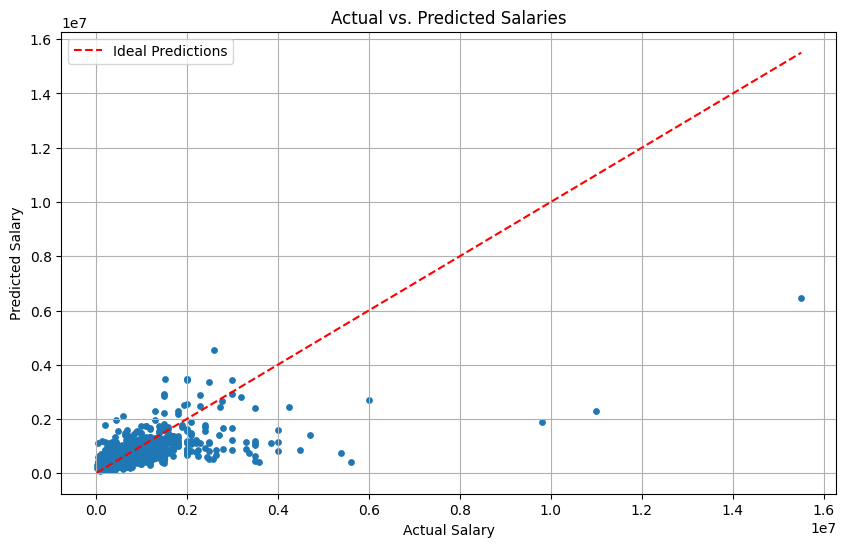

In [175]:
from sklearn.model_selection import cross_val_predict

# final training on the whole dataset
full_training = pipeline.fit_transform(salaries)
full_target = y_transformer(salaries['salary'])
voting_regressor.fit(full_training, full_target)

final_predictions = cross_val_predict(voting_regressor, full_training, full_target, cv=5)

# 0.66 R-Squared and 0.65 RMSE
print(f'After training the model on the whole dataset:\nR-Squared: {voting_regressor.score(full_training, full_target)}, RMSE: {np.sqrt(mean_squared_error(full_target, final_predictions))}\n')

real_vs_pred = pd.concat([pd.Series(np.exp(final_predictions), name='predicted_salary'), np.exp(full_target.reset_index(drop=True))], axis=1)

plt.figure(figsize=(10, 6))
plt.scatter(real_vs_pred['salary'], real_vs_pred['predicted_salary'], s=15)

# Create the ideal prediction line (y = x)
x_values = np.array([min(real_vs_pred['salary']), max(real_vs_pred['salary'])])  # Range of actual salaries
plt.plot(x_values, x_values, color='red', linestyle='--', label='Ideal Predictions')  # y = x line

plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted Salaries')
plt.legend()
plt.grid(True)
plt.show()

# the closer the blue dots are to the red line, the better the model is performing. in ideal case, the blue dots would fully cover the red line.

# A closer look at individual salaries and their predictions

In [176]:
pd.set_option('display.float_format', lambda x: f'{x:.0f}')
salaries['predicted_salary'] = np.exp(final_predictions) # the predictions are especially off when the experience is missing or the instance is rare
salaries.sample(frac=0.02)

,date,company,title,salary,experience,predicted_salary
567,6/12/2021 11:59:13,NaN,Angular developer,"200,000",1.5,292486
243,7/21/2019 23:56:15,MerSoft,Frontend Developer,"220,000",1,261533
427,8/7/2020 15:17:18,NaN,Marketing event manager,"180,000",1.5,337870
1035,2/5/2024 1:24:25,Sperasoft,Project Manager,"820,000",5,1238192
544,4/25/2021 1:24:46,DataArt,Frontend Developer,"1,400,000",5,1068462
914,3/17/2023 11:40:01,DataArt,Android Developer,"700,000",5,1585564
406,6/30/2020 1:27:10,OMD,C++ software engineer,"1,600,000",8,867917
870,12/17/2022 0:00:13,NaN,Manual / Automation QA,"350,000",3,338159
325,1/2/2020 17:32:27,NaN,Senior Software Engineer,"1,300,000",4,1043581
405,6/26/2020 23:38:13,Upwork,TimeTracker On/Off Developer,"3,500,000",2,458550


# Final thoughts: This project started from my personal interest in a publicly available dataset. Although limited by data availability, this exploration sets a baseline for future investigations. With an expanded dataset and potentially more advanced modeling techniques,  there is significant potential to refine salary predictions in Armenian job market.
